### 1. Loading Data into jupyterbook

In [ ]:
from google.colab import files
download=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Loading Dataset

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:19<00:00, 75.4MB/s]
100% 1.06G/1.06G [00:20<00:00, 57.1MB/s]


unzipinng data from zip file

In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### 2. Preprocessing data and importing libraries for Model Training

In [ ]:
# importing all required library 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

to load images from directory 

In [ ]:
# training data
train_data=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

# testing data
test_data =keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
print(train_data)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


normalizing the images so model can easily converge

In [8]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_data = train_data.map(process)
test_data = test_data.map(process)

### 3. Creating & Training CNN model

In [ ]:
# creating a model object
model = Sequential()

# convolution layers
# it has 4 covolution layers, max-pooling & batchnormalization for each convolution
model.add(Conv2D(64, kernel_size=(7,7), activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(5,5), activation="relu"))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D())
model.add(BatchNormalization())

# now flatten after convolution to pass this to fully-connected(dense) layer
# Dropout added after each layer to control overfitting
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

# output layer to predict binary classification
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 250, 250, 64)        │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 125, 125, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 121, 121, 64)        │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 60, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 58, 58, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 29, 29, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 27, 27, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 488,705 (1.86 MB)

 Trainable params: 488,321 (1.86 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# adam used as optimizer and loss function is binary_crossentropy
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

training model

In [12]:
model.fit(train_data,epochs=15, validation_data=test_data)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 122ms/step - accuracy: 0.5567 - loss: 0.8596 - val_accuracy: 0.6786 - val_loss: 0.6255
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 119ms/step - accuracy: 0.6761 - loss: 0.6008 - val_accuracy: 0.7652 - val_loss: 0.5093
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.7572 - loss: 0.5073 - val_accuracy: 0.7582 - val_loss: 0.5070
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 111ms/step - accuracy: 0.7950 - loss: 0.4486 - val_accuracy: 0.7740 - val_loss: 0.4701
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 114ms/step - accuracy: 0.8240 - loss: 0.3933 - val_accuracy: 0.7740 - val_loss: 0.4658
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 117ms/step - accuracy: 0.8487 - loss: 0.3468 - val_accuracy: 0.8014 - val_loss: 0.4331
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 114ms/step - accuracy: 0.8733 - loss: 0.3061 - val_accuracy: 0.8430 - val_loss: 0.3653
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 119ms/step - accuracy: 0.9012 - loss: 

### 4. Evaluating the model

In [64]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.8468 - loss: 0.4570
Test Accuracy: 85.40%


importing some photos of cats and dog to check is model predicting right or wrong

In [55]:
import cv2
import matplotlib.pyplot as plt
cat1 = plt.imread("cat.jpg")
cat2 = plt.imread("cat2.jpg")
dog = plt.imread("dog.jpg")

In [50]:
cat1=cat1/255
cat2=cat2/255
dog = dog/255

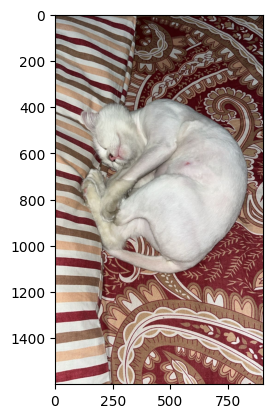

In [22]:
plt.imshow(cat1)

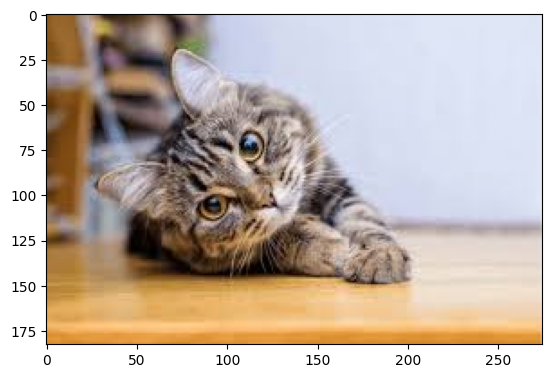

In [24]:
plt.imshow(cat2)

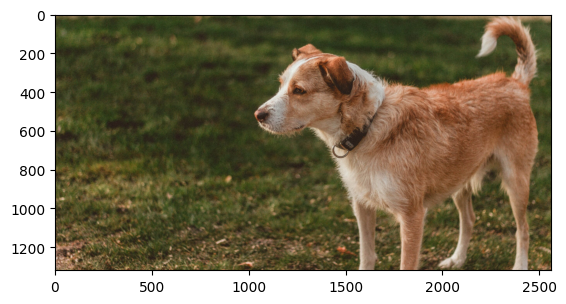

In [30]:
plt.imshow(dog)

In [ ]:
# this function will get picture and model and then predict for that picture using model
def cat_vs_dog_prediction(animal, model):
  import cv2
  animal = animal/255
  animal = cv2.resize(animal, (256,256))
  animal = animal.reshape((1,256,256,3))
  pred = model.predict(animal)
  animal = "cat" if pred<0.5 else "dog"
  return animal, pred

In [61]:
animal, pred=cat_vs_dog_prediction(dog, model)
print(f"This is picture of {animal} and pred is: {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
This is picture of dog and pred is: [[1.]]


In [62]:
animal, pred=cat_vs_dog_prediction(cat1, model)
print(f"This is picture of {animal} and pred is: {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This is picture of cat and pred is: [[3.4784541e-06]]


In [63]:
animal, pred=cat_vs_dog_prediction(cat2, model)
print(f"This is picture of {animal} and pred is: {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
This is picture of cat and pred is: [[0.00014769]]
